# Diabetes Prediction Project

-- This model will be able to predict if a person has diabetes or not

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### 1 = diabetes
##### 0 = not diabetes

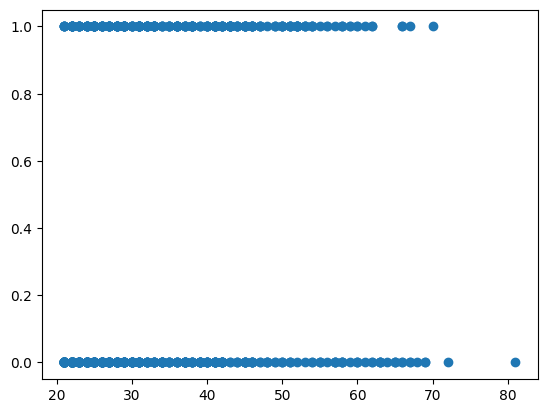

In [4]:
plt.scatter(dataset.Age, dataset.Outcome)

In [5]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

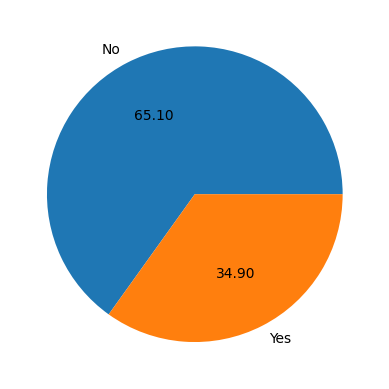

In [6]:
plt.pie(dataset['Outcome'].value_counts(), labels=['No', 'Yes'],  autopct='%0.2f')
plt.show()

### Spliting into Training and Testing set

In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
scaler_X_train = sc_x.fit_transform(X_train)

In [10]:
print(X_train[:5])
print(scaler_X_train[:5])

[[7.00e+00 1.50e+02 7.80e+01 2.90e+01 1.26e+02 3.52e+01 6.92e-01 5.40e+01]
 [4.00e+00 9.70e+01 6.00e+01 2.30e+01 0.00e+00 2.82e+01 4.43e-01 2.20e+01]
 [0.00e+00 1.65e+02 9.00e+01 3.30e+01 6.80e+02 5.23e+01 4.27e-01 2.30e+01]
 [1.00e+00 1.09e+02 5.60e+01 2.10e+01 1.35e+02 2.52e+01 8.33e-01 2.30e+01]
 [8.00e+00 1.20e+02 0.00e+00 0.00e+00 0.00e+00 3.00e+01 1.83e-01 3.80e+01]]
[[ 0.90832902  0.91569367  0.44912368  0.52222619  0.3736349   0.37852648
   0.67740401  1.69955804]
 [ 0.03644676 -0.75182191 -0.47230103  0.14814855 -0.69965674 -0.50667229
  -0.07049698 -0.96569189]
 [-1.12606292  1.38763205  1.06340683  0.77161128  5.09271083  2.54094063
  -0.11855487 -0.88240283]
 [-0.8354355  -0.37427121 -0.67706208  0.02345601  0.45029859 -0.88604319
   1.10091422 -0.88240283]
 [ 1.19895644 -0.02818307 -3.54371676 -1.28581572 -0.69965674 -0.27904975
  -0.85143778  0.36693308]]


## Model Building

## Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0)
lr_model.fit(scaler_X_train, y_train)

LogisticRegression(random_state=0)

In [12]:
lr_y_pred = lr_model.predict(sc_x.transform(X_test))
np.concatenate((lr_y_pred.reshape(len(lr_y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:30]

array([[1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0]])

## KNN 

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=2)
knn_model.fit(scaler_X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [14]:
knn_y_pred = knn_model.predict(sc_x.transform(X_test))
np.concatenate((knn_y_pred.reshape(len(knn_y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:30]

array([[1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0]])

## SVM

In [15]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', random_state=0)
svc_model.fit(scaler_X_train, y_train)

SVC(random_state=0)

In [16]:
svc_y_pred = svc_model.predict(sc_x.transform(X_test))
np.concatenate((svc_y_pred.reshape(len(svc_y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:30]

array([[1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0]])

## Naive Byes Model

In [17]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [18]:
nb_y_pred = nb_model.predict(X_test)
np.concatenate((nb_y_pred.reshape(len(nb_y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:30]

array([[1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0]])

## Decison Tree Classification

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [25]:
dt_y_pred = dt_model.predict(X_test)

## Random Forest Classification

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [28]:
rf_y_pred = rf_model.predict(X_test)

## Model Evalutation

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score, recall_score, f1_score
def get_model_evalution(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    precision = average_precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'accuracy: {accuracy}')
    print(f'confusion matrix: \n {matrix}')
    print(f'precision: {precision}')
    print(f'recall: {recall}')
    print(f'F1 score: {f1}')

In [20]:
get_model_evalution(y_test, lr_y_pred) # Logistic Regression 

accuracy: 0.8246753246753247
confusion matrix: 
 [[98  9]
 [18 29]]
precision: 0.5877677753377641
recall: 0.6170212765957447
F1 score: 0.6823529411764706


In [21]:
get_model_evalution(y_test, knn_y_pred) # KNN model

accuracy: 0.8051948051948052
confusion matrix: 
 [[95 12]
 [18 29]]
precision: 0.5533128003288875
recall: 0.6170212765957447
F1 score: 0.6590909090909092


In [22]:
get_model_evalution(y_test, svc_y_pred) # SVM Model

accuracy: 0.7922077922077922
confusion matrix: 
 [[96 11]
 [21 26]]
precision: 0.5250927910502379
recall: 0.5531914893617021
F1 score: 0.6190476190476191


In [23]:
get_model_evalution(y_test, nb_y_pred) # Naive Byes

accuracy: 0.7922077922077922
confusion matrix: 
 [[93 14]
 [18 29]]
precision: 0.5330137452848982
recall: 0.6170212765957447
F1 score: 0.6444444444444444


In [26]:
get_model_evalution(y_test, dt_y_pred) # Decison Tree

accuracy: 0.7077922077922078
confusion matrix: 
 [[79 28]
 [17 30]]
precision: 0.4405436822898305
recall: 0.6382978723404256
F1 score: 0.5714285714285714


In [29]:
get_model_evalution(y_test, rf_y_pred) # Random Forest

accuracy: 0.7857142857142857
confusion matrix: 
 [[94 13]
 [20 27]]
precision: 0.5176360873169384
recall: 0.574468085106383
F1 score: 0.6206896551724138


## Storing the best performing models in .pkl file

In [31]:
import pickle
pickle.dump(lr_model, open('./ML Models/LogisticRegression_model.pkl', 'wb'))
pickle.dump(knn_model, open('./ML Models/K-Nearest_Neighbours_model.pkl', 'wb'))
pickle.dump(svc_model, open('./ML Models/SupportVectorMachine_model.pkl', 'wb'))

In [ ]:
pickle.dump(sc_x, open('scaler.pkl', 'wb'))